# Data Exploration
We will first explore the data to have a better understanding of its contents. 

In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
plt.style.use('seaborn')

In [62]:
# Read in and append dataframes
data_path = 'data/'
df = pd.DataFrame()
for filename in os.listdir(data_path):
     df = df.append(pd.read_csv(data_path + filename, dtype={'label':str}, na_values='Unspecified'), ignore_index=True)

df.head()

,label,quote,context,author,date,categories,staff
0,barely-true,“Pennsylvania just banned alcohol sales.”,a Facebook post,Viral image,"November 24, 2020","Facebook Fact-checks, Coronavirus",Ciara O'Rourke
1,barely-true,"“666,000 teachers have been laid off already s...",a virtual roundtable,Joe Biden,"November 18, 2020","Education, Coronavirus",Bill McCarthy
2,barely-true,“David Perdue says he'll do everything in his ...,an ad,Jon Ossoff,"November 17, 2020","Georgia, Negative Campaigning",Tom Kertscher
3,barely-true,Says “47 additional counties used the same sof...,a Facebook post,Ted Nugent,"November 17, 2020","Elections, Facebook Fact-checks",Samantha Putterman
4,barely-true,"""Voter FRAUD exposed in Georgia. Over 2600 vot...",in a Live video,Facebook posts,"November 16, 2020","Georgia, Elections, Facebook Fact-checks",Daniel Funke


In [63]:
# Read in meta data
metadata_path = 'metadata/'
df_personalities = pd.read_csv(metadata_path + 'personalities.csv')
df_personalities.head()

,personality,affiliation,description,link
0,13th District GOP slate,Republican,The 13th District GOP slate includes state Sen...,NaN
1,18% of the American public,None,NaN,NaN
2,60 Plus Association,None,The 60 Plus Association is a conservative advo...,http://www.60plus.org/
3,AARP,None,"AARP is a nonprofit, nonpartisan organization ...",http://www.aarp.org/
4,Greg Abbott,Republican,Greg Abbott won election as governor of Texas ...,http://gregabbott.com/


In [64]:
# Merge meta data
df = df.merge(df_personalities, left_on='author', right_on='personality', how='left')
df.head()

,label,quote,context,author,date,categories,staff,personality,affiliation,description,link
0,barely-true,“Pennsylvania just banned alcohol sales.”,a Facebook post,Viral image,"November 24, 2020","Facebook Fact-checks, Coronavirus",Ciara O'Rourke,Viral image,None,"Graphics, pictures and charts shared on social...",NaN
1,barely-true,"“666,000 teachers have been laid off already s...",a virtual roundtable,Joe Biden,"November 18, 2020","Education, Coronavirus",Bill McCarthy,Joe Biden,Democrat,Joe Biden is President-elect of the United Sta...,https://www.joebiden.com/
2,barely-true,“David Perdue says he'll do everything in his ...,an ad,Jon Ossoff,"November 17, 2020","Georgia, Negative Campaigning",Tom Kertscher,Jon Ossoff,Democrat,Jon Ossoff is a Democrat running to succeed fo...,https://electjon.com/
3,barely-true,Says “47 additional counties used the same sof...,a Facebook post,Ted Nugent,"November 17, 2020","Elections, Facebook Fact-checks",Samantha Putterman,Ted Nugent,Republican,"Ted Nugent, who lives near Waco, performed aft...",http://www.tednugent.com/
4,barely-true,"""Voter FRAUD exposed in Georgia. Over 2600 vot...",in a Live video,Facebook posts,"November 16, 2020","Georgia, Elections, Facebook Fact-checks",Daniel Funke,Facebook posts,None,Posters on Facebook and other social media net...,https://www.facebook.com/


## Data Cleaning and Processing

In [3]:
# Format date variable and extract information
df['date_formatted'] = pd.to_datetime(df['date'], format='%B %d, %Y')
df['year'] = df['date_formatted'].dt.year.astype('Int64')

## Counts by Year

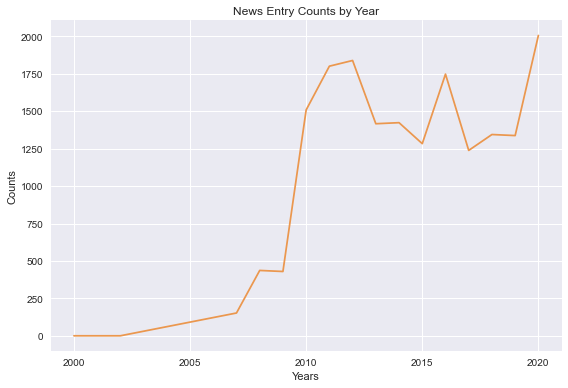

In [4]:
# Plot counts by year
df['year'].value_counts().sort_index().plot(kind='line', xticks=np.arange(2000, 2021, 5), color='#eb974e')
plt.title('News Entry Counts by Year')
plt.xlabel('Years')
plt.ylabel('Counts')
plt.tight_layout()

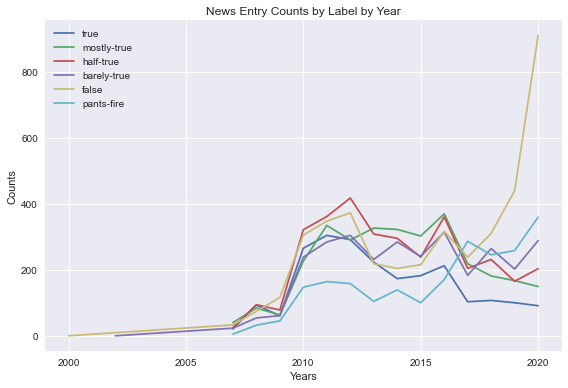

In [5]:
# Plot counts by label by year
r = np.arange(2000, 2021, 5)
df.loc[df['label']=='true', 'year'].value_counts().sort_index().plot(kind='line', xticks=r, label='true')
df.loc[df['label']=='mostly-true', 'year'].value_counts().sort_index().plot(kind='line', xticks=r, label='mostly-true')
df.loc[df['label']=='half-true', 'year'].value_counts().sort_index().plot(kind='line', xticks=r, label='half-true')
df.loc[df['label']=='barely-true', 'year'].value_counts().sort_index().plot(kind='line', xticks=r, label='barely-true')
df.loc[df['label']=='false', 'year'].value_counts().sort_index().plot(kind='line', xticks=r, label='false')
df.loc[df['label']=='pants-fire', 'year'].value_counts().sort_index().plot(kind='line', xticks=r, label='pants-fire')
plt.title('News Entry Counts by Label by Year')
plt.xlabel('Years')
plt.ylabel('Counts')
plt.legend()
plt.tight_layout()

## Counts by Label
**Note:** We observe that there are more `false` news than `true`, which should be taken into consideration during our analyses.

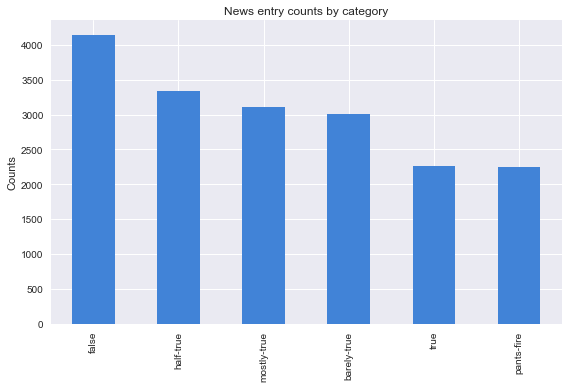

In [6]:
df['label'].value_counts().plot(kind='bar', color='#4183d7')
plt.title('News entry counts by category')
plt.ylabel('Counts')
plt.tight_layout()

## Counts by Author
Top 15 most frequent authors.

In [53]:
truth_o_meter_palette = ['#4ae767', '#b9eb22', '#ffd400', '#fc8c00', '#fd4c4c', '#7a1c6c']
truth_o_meter_labels = ['true','mostly-true', 'half-true', 'barely-true', 'false', 'pants-fire']

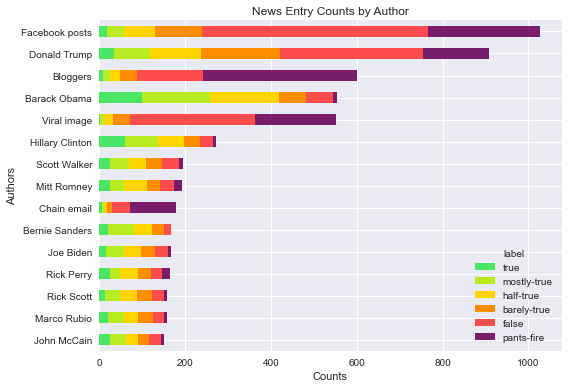

In [55]:
tmp = df.groupby(['author', 'label'])['author'].count().unstack('label').fillna(0)
tmp['total'] = df.groupby(['author'])['author'].count()
tmp.sort_values('total', ascending=False, inplace=True)
tmp[truth_o_meter_labels][:15][::-1].plot(kind='barh', stacked=True, color=truth_o_meter_palette)
plt.title('News Entry Counts by Author')
plt.xlabel('Counts')
plt.ylabel('Authors')
plt.tight_layout()

## Counts by Context
Top 15 most frequent contexts.

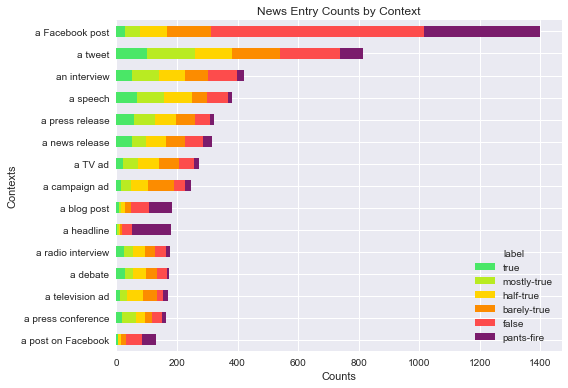

In [56]:
tmp = df.groupby(['context', 'label'])['context'].count().unstack('label').fillna(0)
tmp['total'] = df.groupby(['context'])['context'].count()
tmp.sort_values('total', ascending=False, inplace=True)
tmp[truth_o_meter_labels][:15][::-1].plot(kind='barh', stacked=True, color=truth_o_meter_palette)
plt.title('News Entry Counts by Context')
plt.xlabel('Counts')
plt.ylabel('Contexts')
plt.tight_layout()

## Counts by Categories
Top 15 most frequent categories.

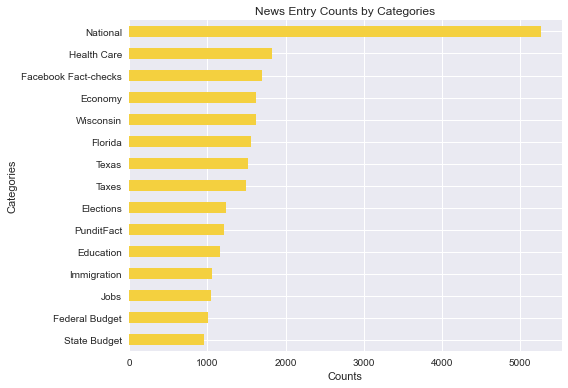

In [9]:
df['categories'].str.split(pat=', ', expand=True).stack().value_counts()[:15][::-1].plot.barh(color='#f4d03f')
plt.title('News Entry Counts by Categories')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.tight_layout()

## Counts by Affiliation
Top 5 most frequent affiliations.

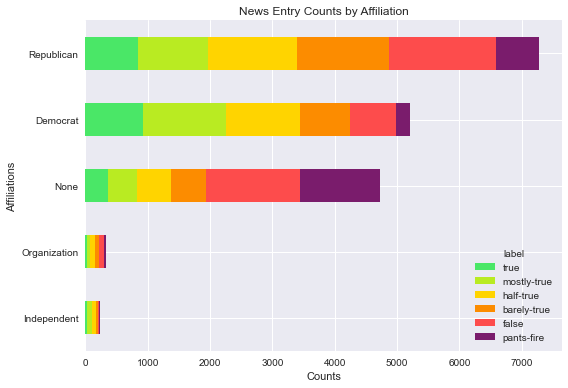

In [66]:
tmp = df.groupby(['affiliation', 'label'])['affiliation'].count().unstack('label').fillna(0)
tmp['total'] = df.groupby(['affiliation'])['affiliation'].count()
tmp.sort_values('total', ascending=False, inplace=True)
tmp[truth_o_meter_labels][:5][::-1].plot(kind='barh', stacked=True, color=truth_o_meter_palette)
plt.title('News Entry Counts by Affiliation')
plt.xlabel('Counts')
plt.ylabel('Affiliations')
plt.tight_layout()

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

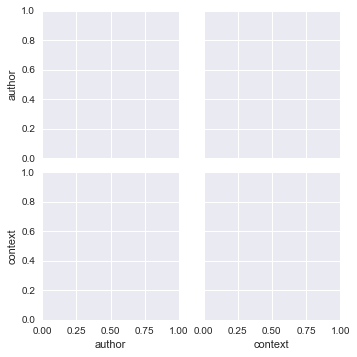

In [67]:
sns_plot = sns.pairplot(df, hue = 'label', vars=['author','context'])

## WordCloud

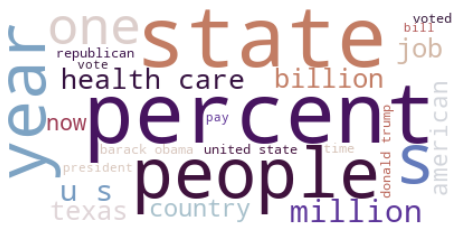

In [10]:
# Concatenate quotes
quotes = " ".join(quote.lower() for quote in df['quote'])

# Set stopwords
stopwords = set(STOPWORDS)
stopwords.add('says')
stopwords.add('said')
stopwords.add('will')

# Generate word cloud
wordcloud = WordCloud(max_font_size=75, max_words=25, stopwords=stopwords, background_color="white", colormap='twilight').generate(quotes)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()